In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Null value Detection and removal**

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
required_data = df.drop(['Description', 'CustomerID', 'InvoiceNo'], axis=1)

In [ ]:
required_data

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...
541904,22613,12,12/9/2011 12:50,0.85,France
541905,22899,6,12/9/2011 12:50,2.10,France
541906,23254,4,12/9/2011 12:50,4.15,France
541907,23255,4,12/9/2011 12:50,4.15,France


In [ ]:
required_data.isna().sum()

StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

# Group By

In [ ]:
sales_region = df.groupby('Country')['UnitPrice'].sum()

In [ ]:
sales_region

Country
Australia                  4054.750
Austria                    1701.520
Bahrain                      86.570
Belgium                    7540.130
Brazil                      142.600
Canada                      910.580
Channel Islands            3738.550
Cyprus                     3920.070
Czech Republic               88.150
Denmark                    1266.950
EIRE                      48447.190
European Community          294.050
Finland                    3786.850
France                    43031.990
Germany                   37666.000
Greece                      713.290
Hong Kong                 12241.500
Iceland                     481.210
Israel                     1079.040
Italy                      3879.390
Japan                       814.860
Lebanon                     242.440
Lithuania                    99.440
Malta                       666.010
Netherlands                6492.550
Norway                     6529.060
Poland                     1422.270
Portugal            

# Bar Plot and Pie Plot for sales distribution by region

Text(0, 0.5, 'Total sales')

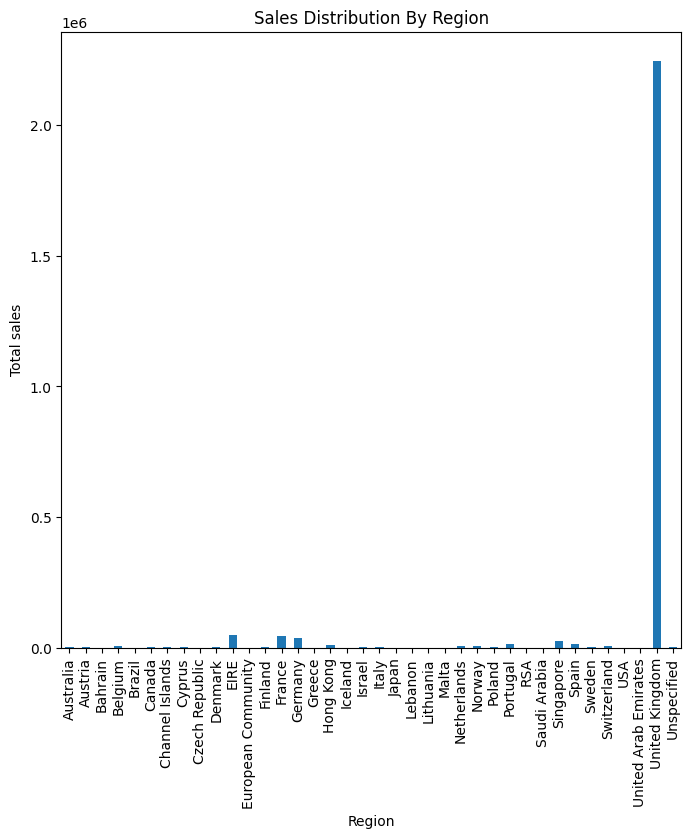

In [ ]:
plt.figure(figsize = (8, 8))
sales_region.plot(kind = 'bar')
plt.title("Sales Distribution By Region")
plt.xlabel("Region")
plt.ylabel('Total sales')

Text(0.5, 1.0, 'Sales Distribution By Region')

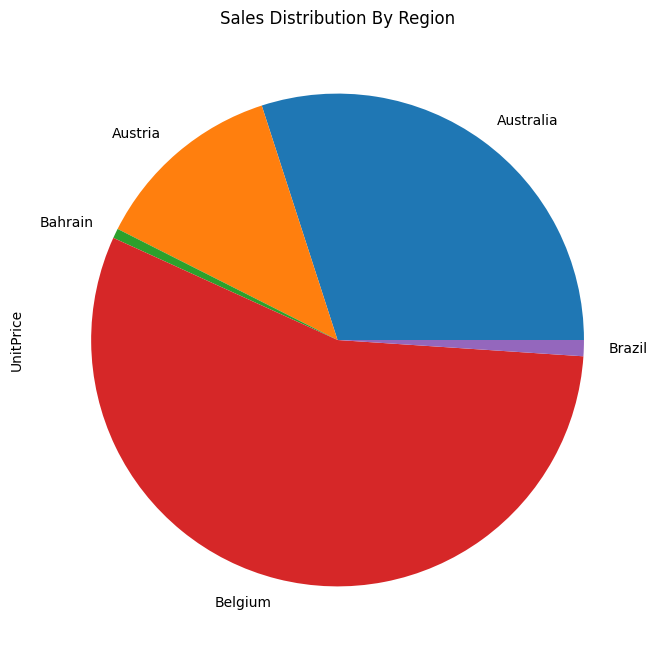

In [ ]:
plt.figure(figsize = (8, 8))
region = df.groupby('Country')['UnitPrice'].sum()[:5]
region.plot(kind = 'pie')
plt.title("Sales Distribution By Region")

# Top performing Region

In [ ]:
sales_region.idxmax()

'United Kingdom'

# Group by country and Quantity

In [ ]:
len(df['Quantity'].unique())

722

In [ ]:
region_stoke_code = df.groupby(['Country', 'StockCode', 'Quantity'])['UnitPrice'].sum()

In [ ]:
region_stoke_code

Country      StockCode  Quantity
Australia    15036      600         0.72
             15056BL    3           5.95
             16161P     400         0.34
             16169E     25          0.42
             20665      6           2.95
                                    ... 
Unspecified  85212      12          0.29
             85213      12          0.29
             85227      1           0.85
                        4           0.85
                        5           0.85
Name: UnitPrice, Length: 67427, dtype: float64

In [ ]:
region_stoke_code = df.groupby(['Country', 'StockCode', 'Quantity'])['UnitPrice'].sum()[:30]

In [ ]:
region_stoke_code

Country    StockCode  Quantity
Australia  15036       600         0.72
           15056BL     3           5.95
           16161P      400         0.34
           16169E      25          0.42
           20665       6           2.95
           20675       72          1.06
                       144         1.06
           20676       72          1.06
                       144         1.06
           20677       72          1.06
                       144         1.06
           20685       4           7.95
                       6           7.95
                       20         13.50
           20711       100         1.79
           20712       10          6.11
           20713       10          1.95
           20717       10          1.25
           20725      -1           1.65
                       1           1.65
                       10          4.95
                       20          1.65
                       30          1.65
                       100         2.90
         

Text(0, 0.5, 'Sales')

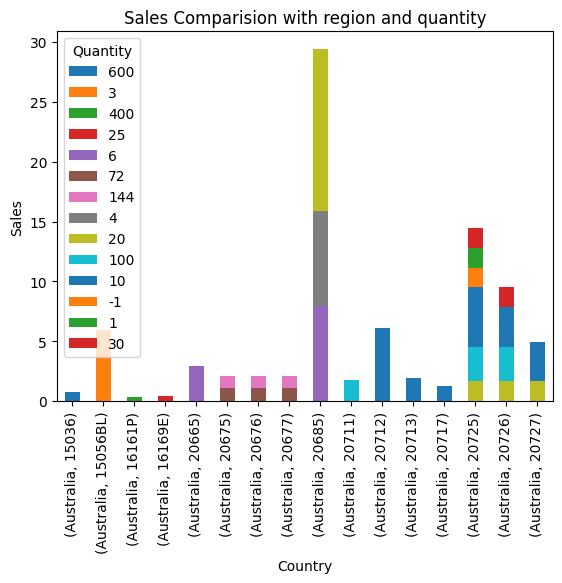

In [ ]:
region_stoke_code.unstack().plot(kind = 'bar', stacked=True)
plt.title("Sales Comparision with region and quantity")
plt.xlabel('Country')
plt.ylabel('Sales')